### Import Necessary Libraries


In [3]:
import pandas as pd
import os

####  Task #1: Merging 12 months of sales data into a single CSV file

In [28]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [4]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [5]:
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    

In [6]:
all_months_data.to_csv('combined_all_months_data.csv',index = False)

#### Read in updated data frame



In [7]:
all_data = pd.read_csv('combined_all_months_data.csv')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


#### Clean up the data!
##### Find rows with NaN

In [8]:
nan_df = all_data[all_data.isna().any(axis = 1)]     # To find out rows with NaN
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,NaN
2220,NaN,NaN,NaN,NaN,NaN,NaN
3044,NaN,NaN,NaN,NaN,NaN,NaN
3242,NaN,NaN,NaN,NaN,NaN,NaN
3373,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's drop those rows with NaN

In [9]:
all_data = all_data.dropna(how ='any')         # To drop all values with NaN
all_data.head(265)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
260,295907,AA Batteries (4-pack),2,3.84,12/18/19 08:43,"672 Dogwood St, Austin, TX 73301"
261,295908,20in Monitor,1,109.99,12/17/19 10:28,"342 Adams St, New York City, NY 10001"
262,295909,AA Batteries (4-pack),1,3.84,12/27/19 17:29,"360 Wilson St, Boston, MA 02215"
263,295910,Lightning Charging Cable,1,14.95,12/27/19 22:46,"6 Wilson St, Seattle, WA 98101"


### Find 'Or' and delete it

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head(265)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
261,295908,20in Monitor,1,109.99,12/17/19 10:28,"342 Adams St, New York City, NY 10001"
262,295909,AA Batteries (4-pack),1,3.84,12/27/19 17:29,"360 Wilson St, Boston, MA 02215"
263,295910,Lightning Charging Cable,1,14.95,12/27/19 22:46,"6 Wilson St, Seattle, WA 98101"
265,295911,Apple Airpods Headphones,1,150,12/10/19 22:14,"152 Spruce St, Los Angeles, CA 90001"


#### Let's convert columns to correct types

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Question 1: What was the best month for sales? How much was earned that month?


#### Task 1:  Let's add one more column 'Month' for this task

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')      #To convert string object (Order Date) into int
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task 2: Add a sales column

In [24]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,11.95


#### Task 4: Add a city column 

In [39]:
# Let's use .apply() method in pandas (to extract city name from Purchase Address)

def get_city(address):
    return address.split(',')[1]

def get_state(state):
    return state.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

#all_data = all_data.drop(columns = 'State')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95


## Question 1: What was the best month for sales? How much was earned that month?

In [95]:
results = all_data.groupby('Month').sum()

### Let's plot this trend using bar chart

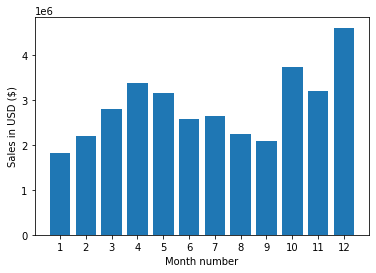

In [99]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2 : What city had the highest number of sales

In [40]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


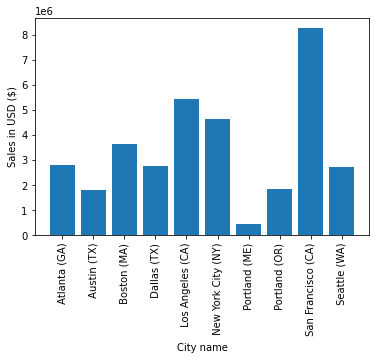

In [51]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product ?

In [52]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95


In [53]:
# Let's convert 'Order  Date' column into datetime:

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [59]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


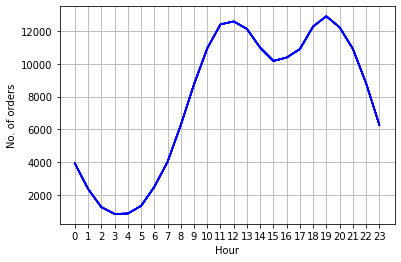

In [80]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(),'b')  
plt.xlabel ('Hour')
plt.ylabel ('No. of orders', )
plt.xticks(hours)
plt.grid()

all_data.groupby(['Hour']).count()

# According to the graph I can recommend that around 11A.M (11) or 7P.M (19) would be good for advertising

## Question 4: What Products are most often sold together ?